In [1]:
import numpy as np
from jacobi import jacobi
from matplotlib import pyplot as plt

/var/folders/tl/pv6mt7z17tz0stm1fjfg01cc0000gp/T/ipykernel_34393/3283276087.py:18: RuntimeWarning: divide by zero encountered in divide
  plt.hist((j - ja(x))/je, bins=50, range=(-5, 5))


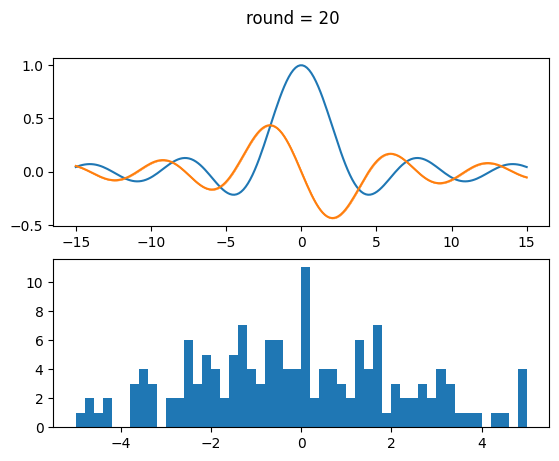

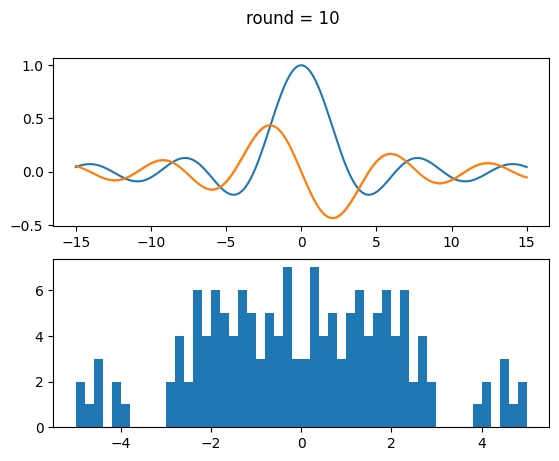

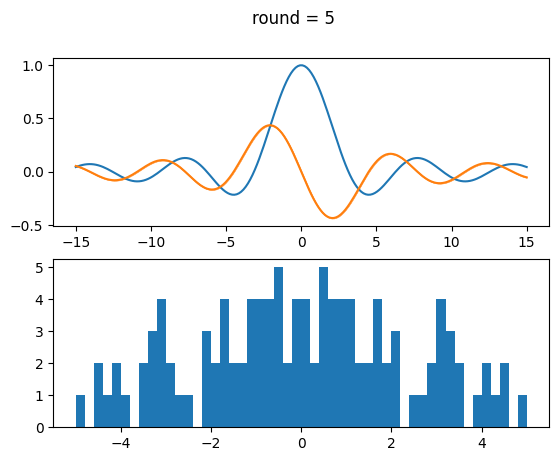

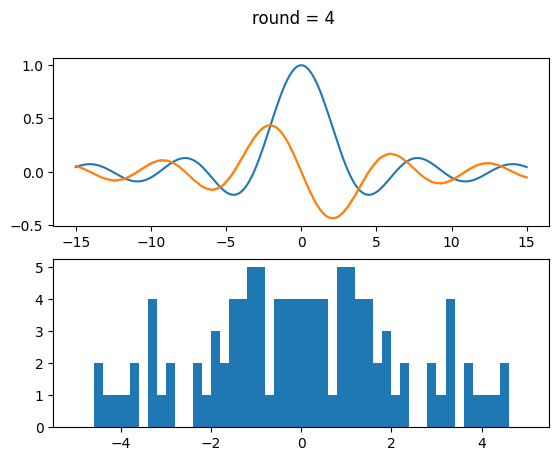

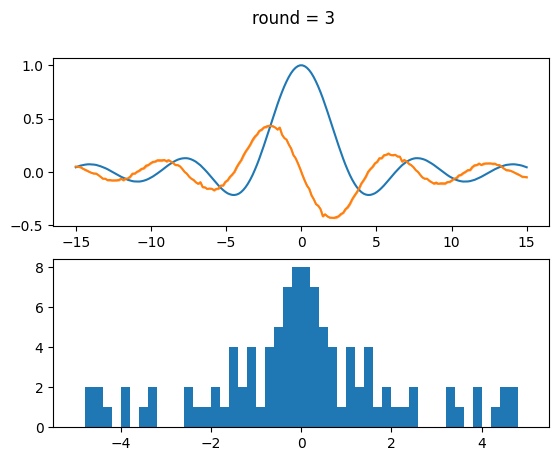

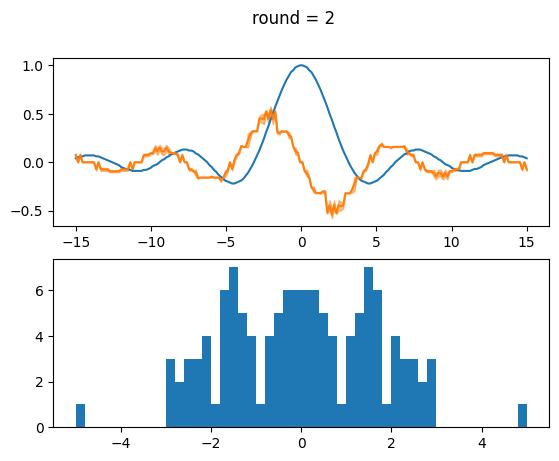

In [6]:
def fn(x, round):
    return np.round(np.sin(x) / x, round)

def ja(x):
    return (x * np.cos(x) - np.sin(x))/x ** 2

x = np.linspace(-15, 15, 200)

for round in (20, 10, 5, 4, 3, 2):
    fig, ax = plt.subplots(2, 1)
    plt.suptitle(f"round = {round}")
    j, je = jacobi(fn, x, round, diagonal=True)
    plt.sca(ax[0])
    plt.plot(x, fn(x, round))
    plt.plot(x, j)
    plt.fill_between(x, j - je, j + je, color="C1", alpha=0.5)
    plt.sca(ax[1])
    plt.hist((j - ja(x))/je, bins=50, range=(-5, 5))
